# Î¶øÏßÄÎ™®Îç∏

## #01. ÏûëÏóÖÏ§ÄÎπÑ

### [1] Ìå®ÌÇ§ÏßÄ Ï∞∏Ï°∞

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from helper.regrassion import *
from helper.util import *
from helper.plot import *
from helper.analysis import *

from sklearn.linear_model import Ridge

### [2] Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx", info=False)
my_pretty_table(origin.head())

+----+--------+--------+--------+--------+
|    |   Í∏∏Ïù¥ |   ÎÜíÏù¥ |   ÎëêÍªò |   Î¨¥Í≤å |
|----+--------+--------+--------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |     32 |
|  2 |     15 |   3.82 |   2.43 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |     70 |
+----+--------+--------+--------+--------+


### [3] Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî

In [18]:
std_df = my_standard_scaler(origin, yname='Î¨¥Í≤å')
my_pretty_table(std_df.head())

+----+----------+----------+----------+--------+
|    |     Í∏∏Ïù¥ |     ÎÜíÏù¥ |     ÎëêÍªò |   Î¨¥Í≤å |
|----+----------+----------+----------+--------|
|  0 | -2.18023 | -2.01651 | -1.89617 |    5.9 |
|  1 | -1.58743 |  -1.5187 | -1.56077 |     32 |
|  2 | -1.44203 | -1.41704 | -1.31633 |     40 |
|  3 | -1.30782 |  -1.1471 | -1.20263 |   51.5 |
|  4 |  -1.1736 |  -1.1471 | -1.02641 |     70 |
+----+----------+----------+----------+--------+


## #02. ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Ìòï

Ïïû ÏòàÏ†úÏóêÏÑú ÌôïÏù∏Ìïú Í≥ºÎåÄÏ†ÅÌï© ÏÉÅÌÉú Ïû¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ Ï∞®ÏàòÍ∞Ä 3Ïù∏ ÌöåÍ∑ÄÎ™®ÌòïÏùÑ Íµ¨ÌòÑÌïúÎã§.

### [1] 3Ï∞® Ìï≠ÏùÑ Í∞ñÎäî Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [19]:
poly_df = my_poly_features(std_df, ignore=['Î¨¥Í≤å'], degree=3)
my_pretty_table(poly_df.head())

+----+----------+----------+----------+----------+-------------+-------------+----------+-------------+----------+----------+---------------+---------------+---------------+------------------+---------------+----------+---------------+---------------+----------+--------+
|    |     Í∏∏Ïù¥ |     ÎÜíÏù¥ |     ÎëêÍªò |   Í∏∏Ïù¥^2 |   Í∏∏Ïù¥ ÎÜíÏù¥ |   Í∏∏Ïù¥ ÎëêÍªò |   ÎÜíÏù¥^2 |   ÎÜíÏù¥ ÎëêÍªò |   ÎëêÍªò^2 |   Í∏∏Ïù¥^3 |   Í∏∏Ïù¥^2 ÎÜíÏù¥ |   Í∏∏Ïù¥^2 ÎëêÍªò |   Í∏∏Ïù¥ ÎÜíÏù¥^2 |   Í∏∏Ïù¥ ÎÜíÏù¥ ÎëêÍªò |   Í∏∏Ïù¥ ÎëêÍªò^2 |   ÎÜíÏù¥^3 |   ÎÜíÏù¥^2 ÎëêÍªò |   ÎÜíÏù¥ ÎëêÍªò^2 |   ÎëêÍªò^3 |   Î¨¥Í≤å |
|----+----------+----------+----------+----------+-------------+-------------+----------+-------------+----------+----------+---------------+---------------+---------------+------------------+---------------+----------+---------------+---------------+----------+--------|
|  0 | -2.18023 | -2.01651 | -1.89617 |  4.75338 |     4.39644 |     4.13409 |   4.0663 |     3.82365 |  3.59548 | -10.363

### [2] ÌõàÎ†®, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [20]:
x_train, x_test, y_train, y_test = my_train_test_split(poly_df, yname='Î¨¥Í≤å', test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((42, 19), (14, 19), (42,), (14,))

### [3] Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä

Ïïû ÏòàÏ†ú Ï†úÌòÑ

[ÍµêÏ∞®Í≤ÄÏ¶ù]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.506585 |
+----+-------------------+

[ÌöåÍ∑ÄÏãù]
Î¨¥Í≤å = 183.647 * Í∏∏Ïù¥ + 91.546 * ÎÜíÏù¥ + 15.900 * ÎëêÍªò + -218.774 * Í∏∏Ïù¥^2 + 1529.221 * Í∏∏Ïù¥ ÎÜíÏù¥ + -1065.606 * Í∏∏Ïù¥ ÎëêÍªò + -431.260 * ÎÜíÏù¥^2 + -513.022 * ÎÜíÏù¥ ÎëêÍªò + 792.842 * ÎëêÍªò^2 + 2244.072 * Í∏∏Ïù¥^3 + -9754.567 * Í∏∏Ïù¥^2 ÎÜíÏù¥ + 3469.316 * Í∏∏Ïù¥^2 ÎëêÍªò + 5247.748 * Í∏∏Ïù¥ ÎÜíÏù¥^2 + 9298.437 * Í∏∏Ïù¥ ÎÜíÏù¥ ÎëêÍªò + -8799.181 * Í∏∏Ïù¥ ÎëêÍªò^2 + -643.099 * ÎÜíÏù¥^3 + -3710.045 * ÎÜíÏù¥^2 ÎëêÍªò + -516.396 * ÎÜíÏù¥ ÎëêÍªò^2 + 3167.546 * ÎëêÍªò^3 + 279.431

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+-------------------------------+--------------+--------------+
|                               |   ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |   Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ |
|-------------------------------+--------------+--------------|
| Í≤∞Ï†ïÍ≥ÑÏàò(R2)                  |     0.996126 |     -1.79386 |
| ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE)             |   

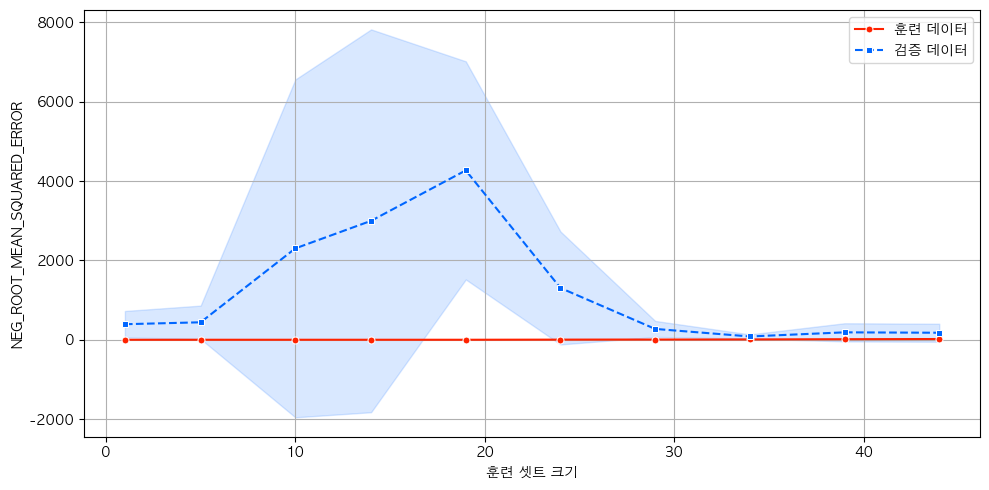

In [21]:
estimator = my_linear_regrassion(x_train, y_train, x_test, y_test, cv=5, learning_curve=True, dpi=100)

## #03. Î¶øÏßÄÌöåÍ∑ÄÎ™®Ìòï

### [1] Í∏∞Î≥∏ Ï†ÅÏö©

ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Ïóê Í∑úÏ†úÎ•º Ï†ÅÏö©Ìï† Îïå Í≥ÑÏàò Í∞íÏùò ÌÅ¨Í∏∞Í∞Ä ÏÑúÎ°ú ÎßéÏù¥ Îã§Î•¥Î©¥ Í≥µÏ†ïÌïòÍ≤å Ï†úÏñ¥ÎêòÏßÄ ÏïäÏùÑ ÏàòÎèÑ ÏûàÎã§. 

Í∑∏Îü¨ÎØÄÎ°ú Í∑úÏ†úÎ•º Ï†ÅÏö©ÌïòÍ∏∞ Ï†ÑÏóê Ï†ïÍ∑úÌôîÎ•º Î®ºÏ†ÄÌï¥ÏïºÎêúÎã§.

> Ïó¨Í∏∞ÏÑúÎäî Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Í≥ºÏ†ïÏóêÏÑú ÎØ∏Î¶¨ Ïä§ÏºÄÏùºÎßÅÏùÑ Ï†ÅÏö©Ìï¥ ÎëêÏóàÎã§.

#### (1) Î™®Îç∏ ÏÉùÏÑ±

In [22]:
estimator = Ridge()
estimator.fit(x_train, y_train)

Ridge()

#### (2) Í≤∞Í≥º ÌôïÏù∏

Î¶øÏßÄ ÌöåÍ∑ÄÎèÑ ÏÑ†ÌòïÌöåÍ∑ÄÏùò ÏùºÏ¢ÖÏù¥ÎØÄÎ°ú ÎØ∏Î¶¨ Íµ¨ÌòÑÌï¥Îëî Í≤∞Í≥º ÌôïÏù∏ Ìï®ÏàòÎ•º Ïû¨ÏÇ¨Ïö© Ìï† Ïàò ÏûàÎã§.

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+-------------------------------+--------------+--------------+
|                               |   ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |   Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ |
|-------------------------------+--------------+--------------|
| Í≤∞Ï†ïÍ≥ÑÏàò(R2)                  |      0.98858 |     0.988362 |
| ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE)             |      26.1986 |       27.184 |
| ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)             |      1349.98 |      1397.26 |
| ÌèâÍ∑†Ïò§Ï∞®(RMSE)                |       36.742 |      37.3799 |
| ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |      8.39293 |      54.3147 |
| ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE)           |     -1.43495 |      48.4407 |
+-------------------------------+--------------+--------------+

[ÌïôÏäµÍ≥°ÏÑ†]


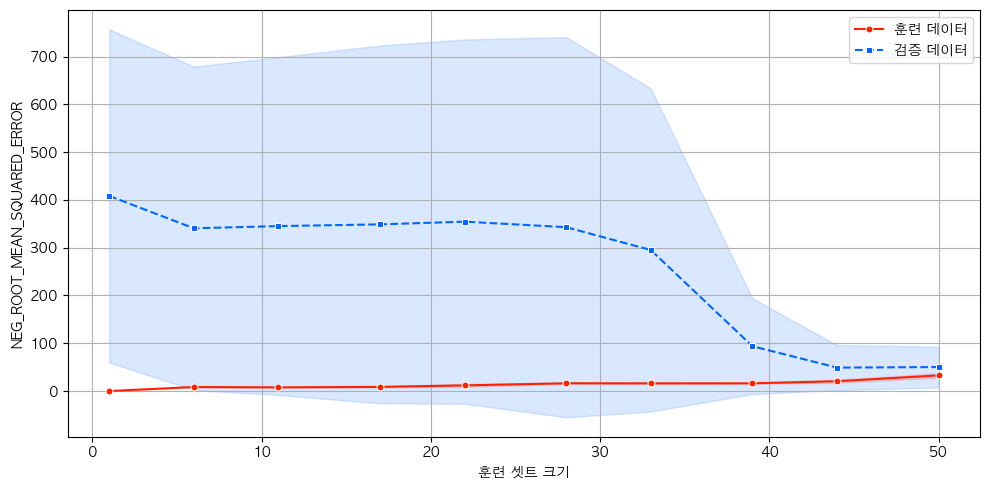

In [23]:
my_regrassion_result(estimator, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, dpi=100)

### [2] Í∑úÏ†ú Ï°∞Ï†àÌïòÍ∏∞

Î¶øÏßÄÎ™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† Îïå Í∑úÏ†úÏùò ÏñëÏùÑ ÏûÑÏùòÎ°ú Ï°∞Ï†àÌï† Ïàò ÏûàÎã§. 

Î™®Îç∏ Í∞ùÏ≤¥Î•º ÎßåÎì§ Îïå alpha ÏÉùÏÑ±Ïûê ÌååÎùºÎØ∏ÌÑ∞Î°ú Í∑úÏ†úÏùò Í∞ïÎèÑÎ•º Ï°∞Ï†àÌïúÎã§.

- alphaÍ∞íÏù¥ ÌÅ¨Î©¥ Í∑úÏ†ú Í∞ïÎèÑÍ∞Ä ÏÑ∏ÏßÄÎØÄÎ°ú Í≥ÑÏàò Í∞íÏùÑ Îçî Ï§ÑÏù¥Í≥† Ï°∞Í∏à Îçî Í≥ºÏÜåÏ†ÅÌï©ÎêòÎèÑÎ°ù Ïú†ÎèÑÌïúÎã§.
- alphaÍ∞íÏù¥ ÏûëÏúºÎ©¥ Í≥ÑÏàòÎ•º Ï§ÑÏù¥Îäî Ïó≠Ìï†Ïù¥ Ï§ÑÏñ¥Îì§Í≥† ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Í≥º Ïú†ÏÇ¨Ìï¥ÏßÄÎØÄÎ°ú Í≥ºÎåÄÏ†ÅÌï©Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ¨Îã§.

> alpha Í∞íÏùÄ Ï†ïÌï¥ÏßÑ Í∞íÏù¥ ÏóÜÏúºÎ©∞ Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Îã¨ÎùºÏßÄÎØÄÎ°ú Î∂ÑÏÑùÏùÑ ÏàòÌñâÌï† Îïå ÎßàÎã§ ÏµúÏ†ÅÏùò Í∞íÏùÑ Î∂ÑÏÑùÍ∞ÄÍ∞Ä Ï∞æÏïÑÏïº ÌïúÎã§.

#### ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(hyperparameter)

alpha Í∞íÏùÄ Î¶øÏßÄ Î™®Îç∏Ïù¥ ÌïôÏäµÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº Í∞úÎ∞úÏûêÍ∞Ä ÏßÄÏ†ïÌï¥Ïïº ÌïòÎäî Í∞íÏù¥Îã§. 

Ïù¥Î†áÍ≤å Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïù¥ ÌïôÏäµÌï† Ïàò ÏóÜÍ≥† ÏßÅÏ†ë Ï†ïÌï¥Ïïº ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Î•º ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(hyperparameter)ÎùºÍ≥† Î∂ÄÎ•∏Îã§.

ÏÇ¨Ïù¥ÌÇ∑Îü∞Í≥º Í∞ôÏùÄ Î®∏Ïã†Îü¨Îãù ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îäî ÌÅ¥ÎûòÏä§ÏôÄ Îß§ÏÑúÎìúÏùò Îß§Í∞úÎ≥ÄÏàòÎ°ú ÌëúÌòÑÎêúÎã§.

#### (1) Î∞òÎ≥µÎ¨∏ÏúºÎ°ú ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞

In [24]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    estimator = Ridge(alpha=alpha)
    estimator.fit(x_train, y_train) 
    train_score.append(estimator.score(x_train, y_train))
    test_score.append(estimator.score(x_test, y_test))
    
train_score, test_score

([0.9932711373231421,
  0.9920548437900033,
  0.990559534096909,
  0.9885799454120571,
  0.9745590169724654,
  0.9101776532975747],
 [0.9130268743137162,
  0.9220959562016988,
  0.9815382452832995,
  0.9883616890525011,
  0.9306008614832829,
  0.6717818125785049])

#### (2) ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî

$x$Ï∂ïÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî `alpha_list` Í∞ÑÍ≤©Ïù¥ ÏùºÏ†ïÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê Í∑∏ÎûòÌîÑÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥ê ÎÇòÏôÄ ÌåêÎ≥ÑÏù¥ Ïñ¥Î†µÎã§.

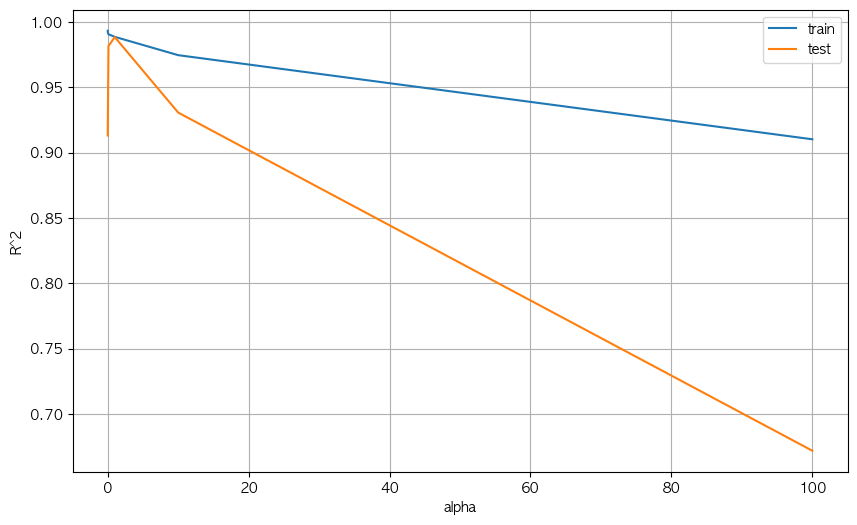

In [25]:
plt.figure(dpi=100)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïä§ÏΩîÏñ¥
sb.lineplot(x=alpha_list, y=train_score, label='train')

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ïä§ÏΩîÏñ¥
sb.lineplot(x=alpha_list, y=test_score, label='test')

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.grid()
plt.show()
plt.close()

#### (3) ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî

$x$Ï∂ïÏúºÎ°ú Í∞ÑÍ≤©ÏùÑ Í∑†ÏùºÌïòÍ≤å Î≥ÄÌôòÌïòÍ∏∞ ÏúÑÌï¥ Î°úÍ∑∏ Ï†ÅÏö©

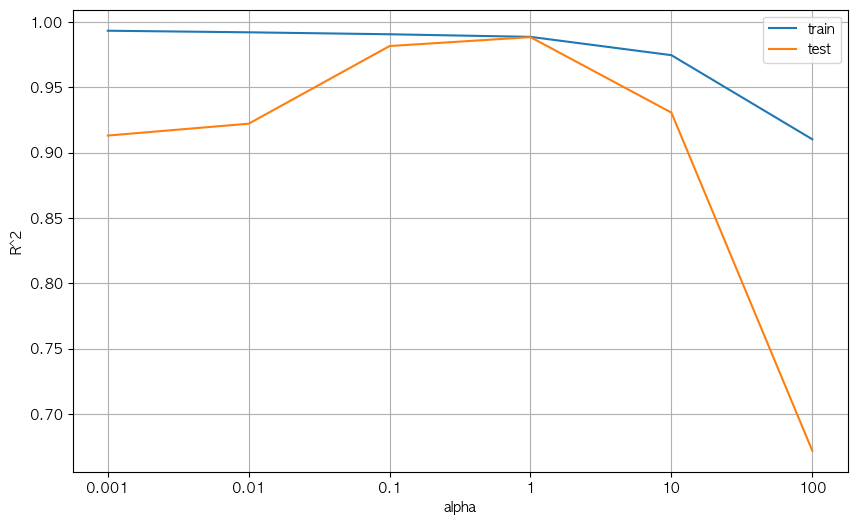

In [26]:
# log 0.001 = -3
xticks = []
for i in range(-3, -3+len(alpha_list)):
    xticks.append(i)

plt.figure(dpi=100)
sb.lineplot(x=np.log10(alpha_list), y=train_score, label='train')
sb.lineplot(x=np.log10(alpha_list), y=test_score, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.xticks(xticks, alpha_list)
plt.grid()
plt.show()
plt.close()

> Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º Î≥¥Ïù¥Îäî alphaÍ∞íÏùÄ `1`Ïù¥Îã§.

#### (4) ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï†ÅÏö©Ìïú ÏµúÏ¢Ö Î™®Îç∏ ÎèÑÏ∂ú

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+-------------------------------+--------------+--------------+
|                               |   ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |   Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ |
|-------------------------------+--------------+--------------|
| Í≤∞Ï†ïÍ≥ÑÏàò(R2)                  |      0.98858 |     0.988362 |
| ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE)             |      26.1986 |       27.184 |
| ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)             |      1349.98 |      1397.26 |
| ÌèâÍ∑†Ïò§Ï∞®(RMSE)                |       36.742 |      37.3799 |
| ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |      8.39293 |      54.3147 |
| ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE)           |     -1.43495 |      48.4407 |
+-------------------------------+--------------+--------------+

[ÌïôÏäµÍ≥°ÏÑ†]


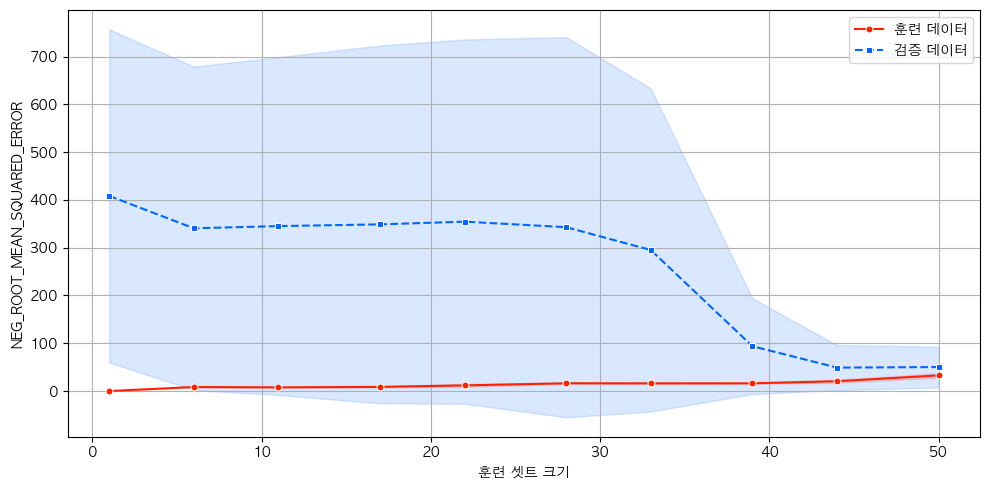

In [27]:
estimator = Ridge(alpha=1)
estimator.fit(x_train, y_train) 
my_regrassion_result(estimator, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, dpi=100)

## #04. ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞

In [28]:
# Ï∞æÍ≥†Ïûê ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞ ÌõÑÎ≥¥
params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100]
}

# Î™®Îç∏ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï† ÎïåÎäî Ï∞æÏïÑÏïº ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Î•º ÏßÄÏ†ïÌïòÏßÄ ÏïäÏäµÎãàÎã§.
estimator = Ridge()

# GridSearchCVÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
grid = GridSearchCV(estimator, param_grid=params, cv=10, n_jobs=-1)
grid.fit(x_train, y_train)
        
result_df = DataFrame(grid.cv_results_['params'])
result_df['mean_test_score'] = grid.cv_results_['mean_test_score']
my_pretty_table(result_df.sort_values(by='mean_test_score', ascending=False))

+----+---------+-------------------+
|    |   alpha |   mean_test_score |
|----+---------+-------------------|
|  3 |       1 |           0.96326 |
|  2 |     0.1 |          0.947963 |
|  4 |      10 |          0.947282 |
|  1 |    0.01 |          0.912876 |
|  0 |   0.001 |          0.825755 |
|  5 |     100 |          0.820881 |
+----+---------+-------------------+


[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+-------------------------------+--------------+--------------+
|                               |   ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |   Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ |
|-------------------------------+--------------+--------------|
| Í≤∞Ï†ïÍ≥ÑÏàò(R2)                  |      0.98858 |     0.988362 |
| ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE)             |      26.1986 |       27.184 |
| ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)             |      1349.98 |      1397.26 |
| ÌèâÍ∑†Ïò§Ï∞®(RMSE)                |       36.742 |      37.3799 |
| ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |      8.39293 |      54.3147 |
| ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE)           |     -1.43495 |      48.4407 |
+-------------------------------+--------------+--------------+

[ÌïôÏäµÍ≥°ÏÑ†]


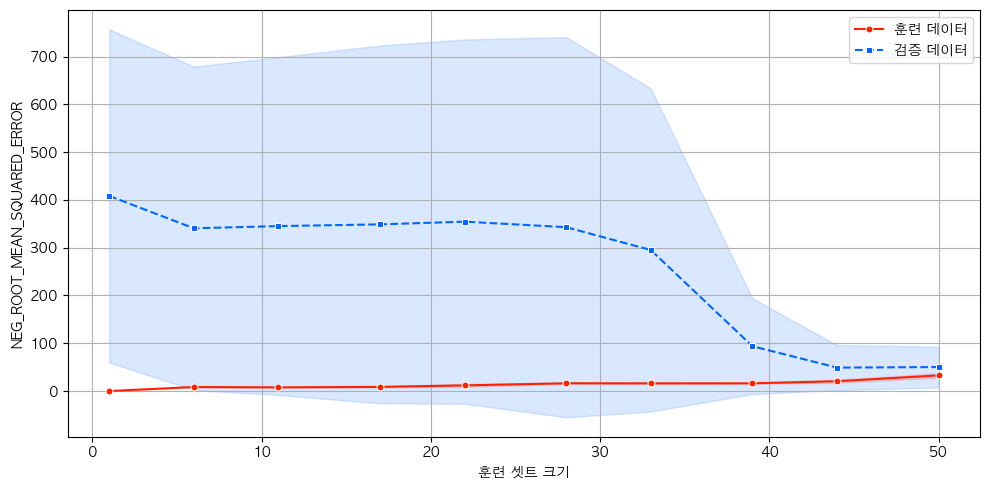

In [29]:
my_regrassion_result(grid.best_estimator_, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, dpi=100)

## #05. Î¶øÏßÄ Î™®ÌòïÏóê ÎåÄÌïú GridSearchCV Î™®ÎìàÌôî ÌôïÏù∏

[Ridge ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞]
+----+---------+
|    |   alpha |
|----+---------|
|  0 |    0.01 |
|  1 |     0.1 |
|  2 |       1 |
|  3 |      10 |
|  4 |     100 |
+----+---------+

[ÍµêÏ∞®Í≤ÄÏ¶ù]
+----+---------+-------------------+
|    |   alpha |   mean_test_score |
|----+---------+-------------------|
|  2 |       1 |          0.973496 |
|  1 |     0.1 |          0.962615 |
|  3 |      10 |          0.953516 |
|  0 |    0.01 |          0.942286 |
|  4 |     100 |          0.853514 |
+----+---------+-------------------+

[ÌöåÍ∑ÄÏãù]
Î¨¥Í≤å = 103.091 * Í∏∏Ïù¥ + 79.532 * ÎÜíÏù¥ + 104.120 * ÎëêÍªò + 9.824 * Í∏∏Ïù¥^2 + 15.699 * Í∏∏Ïù¥ ÎÜíÏù¥ + 16.185 * Í∏∏Ïù¥ ÎëêÍªò + 20.851 * ÎÜíÏù¥^2 + 7.848 * ÎÜíÏù¥ ÎëêÍªò + 17.330 * ÎëêÍªò^2 + -2.972 * Í∏∏Ïù¥^3 + 11.652 * Í∏∏Ïù¥^2 ÎÜíÏù¥ + -2.297 * Í∏∏Ïù¥^2 ÎëêÍªò + 20.702 * Í∏∏Ïù¥ ÎÜíÏù¥^2 + -3.363 * Í∏∏Ïù¥ ÎÜíÏù¥ ÎëêÍªò + -3.539 * Í∏∏Ïù¥ ÎëêÍªò^2 + 18.915 * ÎÜíÏù¥^3 + -14.040 * ÎÜíÏù¥^2 ÎëêÍªò + -19.947 * ÎÜíÏù¥ ÎëêÍªò^2 + 1.449 * ÎëêÍªò^3 + 28

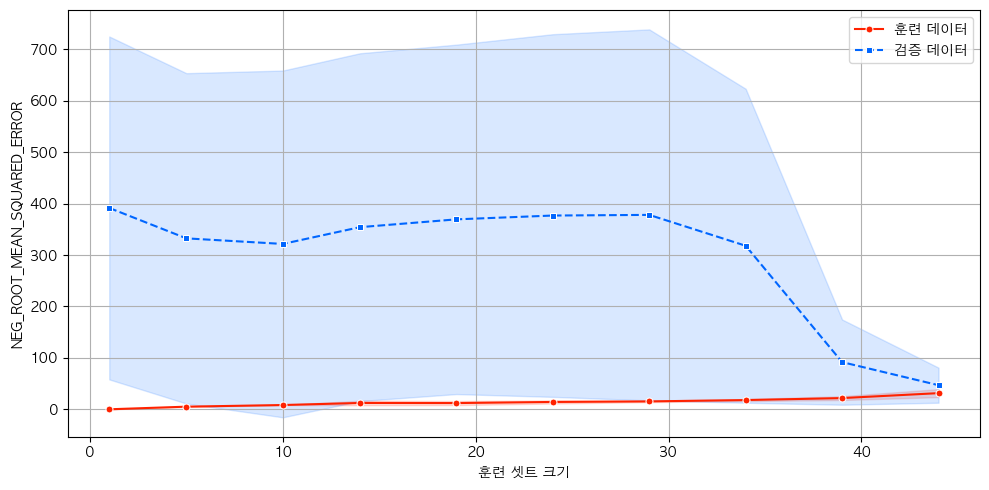


[ÎèÖÎ¶ΩÎ≥ÄÏàòÎ≥¥Í≥†]
+----+------------+----------------+--------------------+-------------+------------------+-----+------------+-------+
|    | Ï¢ÖÏÜçÎ≥ÄÏàò   | ÎèÖÎ¶ΩÎ≥ÄÏàò       |   B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò) |    ÌëúÏ§ÄÏò§Ï∞® |   Œ≤(ÌëúÏ§ÄÌôî Í≥ÑÏàò) |   t |   Ïú†ÏùòÌôïÎ•† |   VIF |
|----+------------+----------------+--------------------+-------------+------------------+-----+------------+-------|
|  0 | Î¨¥Í≤å       | Í∏∏Ïù¥           |            103.091 | 2.25034e+09 |            0.891 |   0 |        nan |   inf |
|  1 | Î¨¥Í≤å       | ÎÜíÏù¥           |            79.5324 | 2.61563e+09 |           -1.223 |   0 |        nan |   inf |
|  2 | Î¨¥Í≤å       | ÎëêÍªò           |             104.12 | 5.34261e+09 |            1.173 |   0 |        nan |   inf |
|  3 | Î¨¥Í≤å       | Í∏∏Ïù¥^2         |             9.8239 | 1.03655e+10 |            0.655 |   0 |        nan |   inf |
|  4 | Î¨¥Í≤å       | Í∏∏Ïù¥ ÎÜíÏù¥      |            15.6986 | 1.50304e+10 |           -0.111 |   0 |      

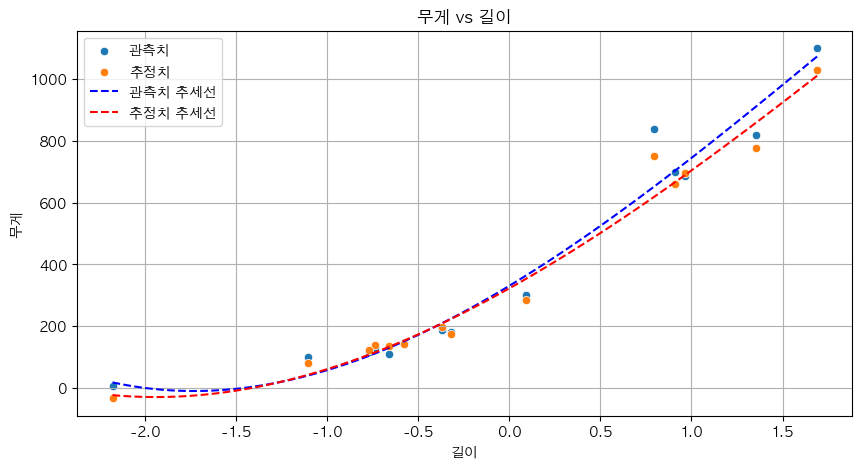

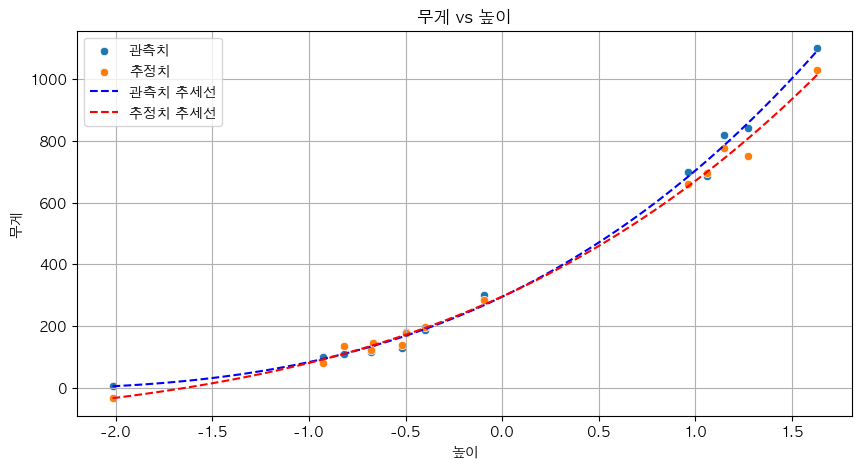

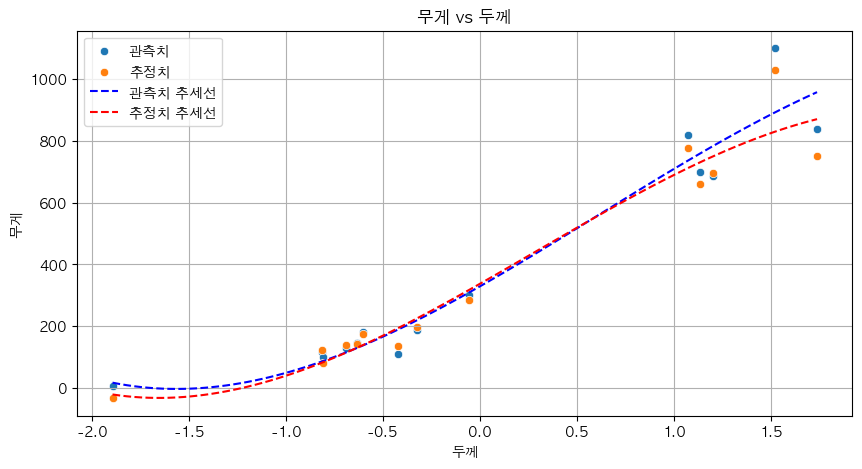

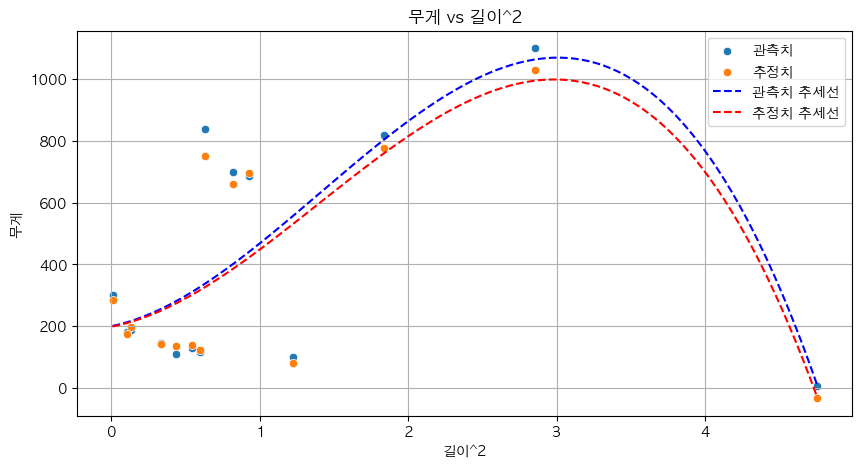

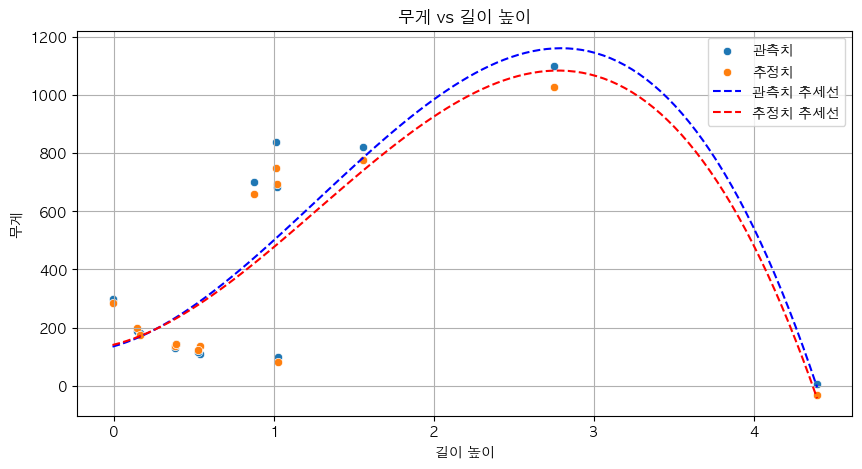

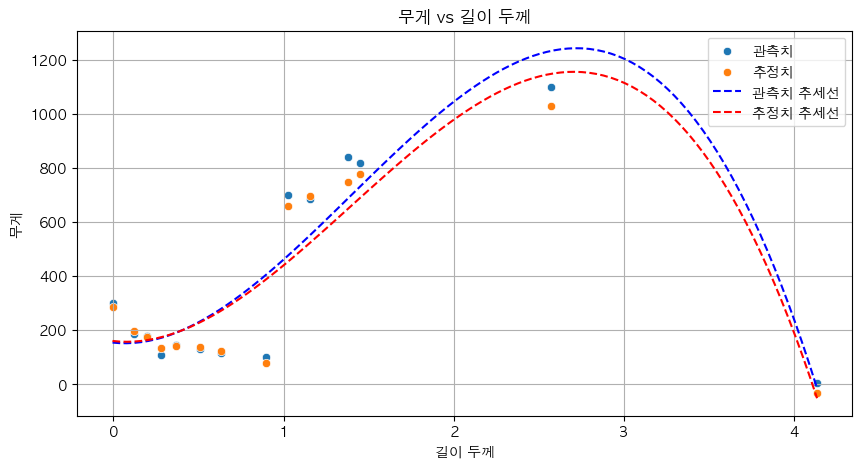

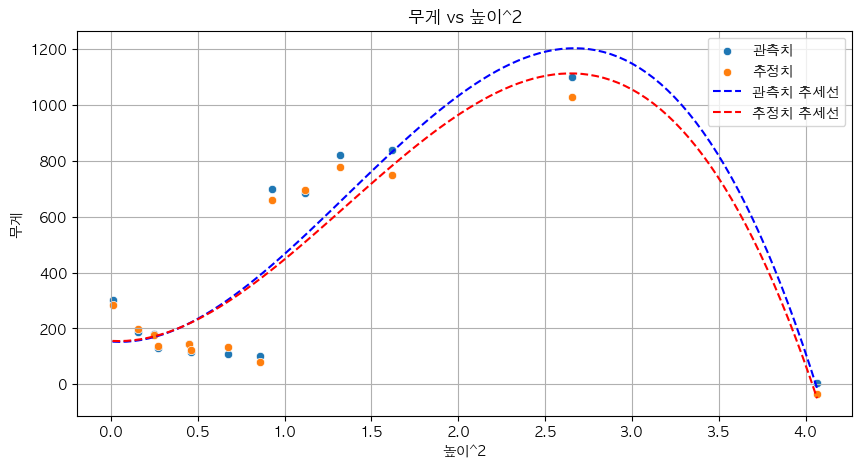

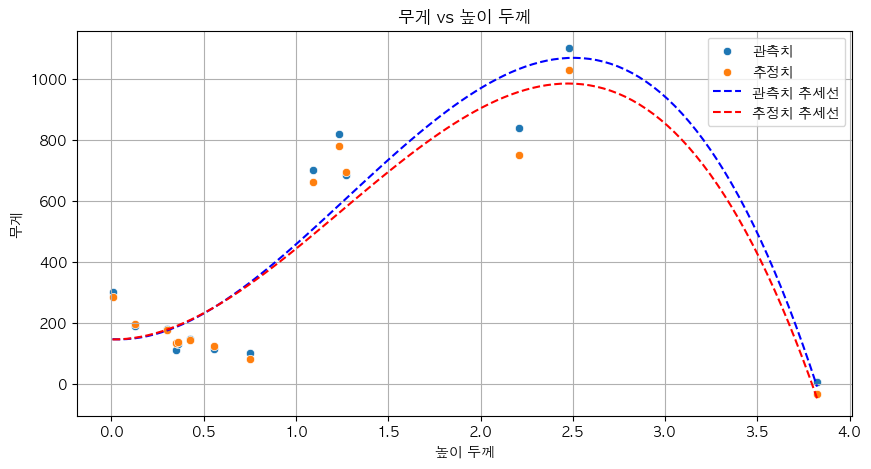

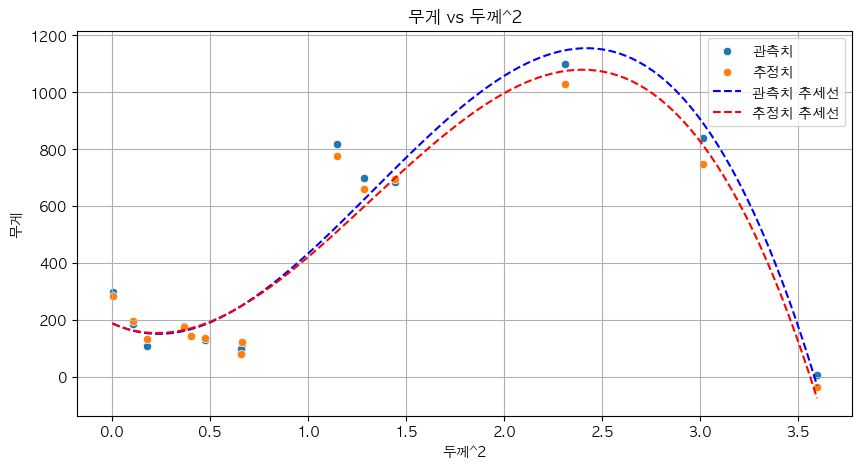

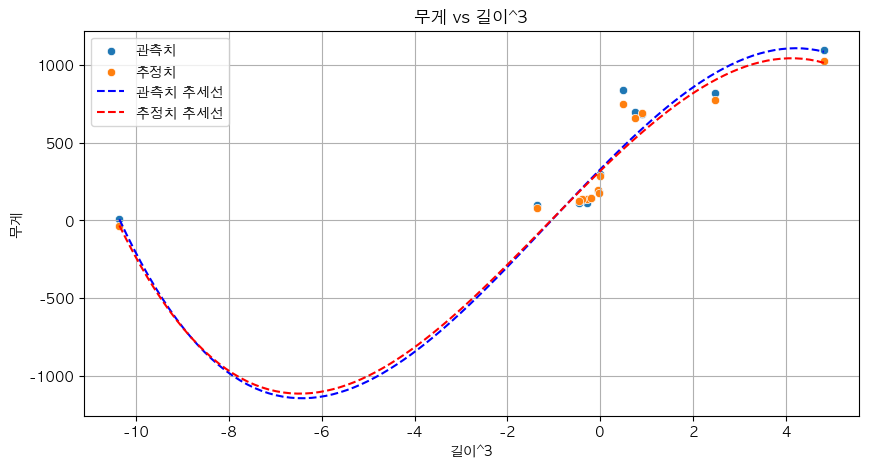

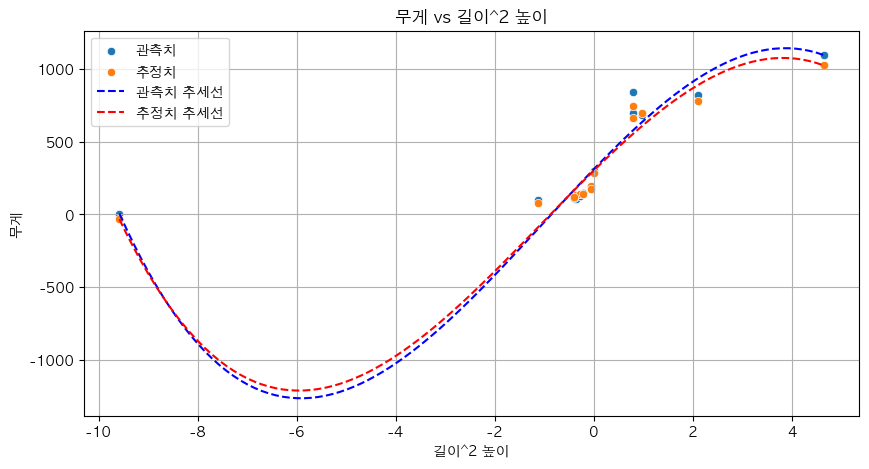

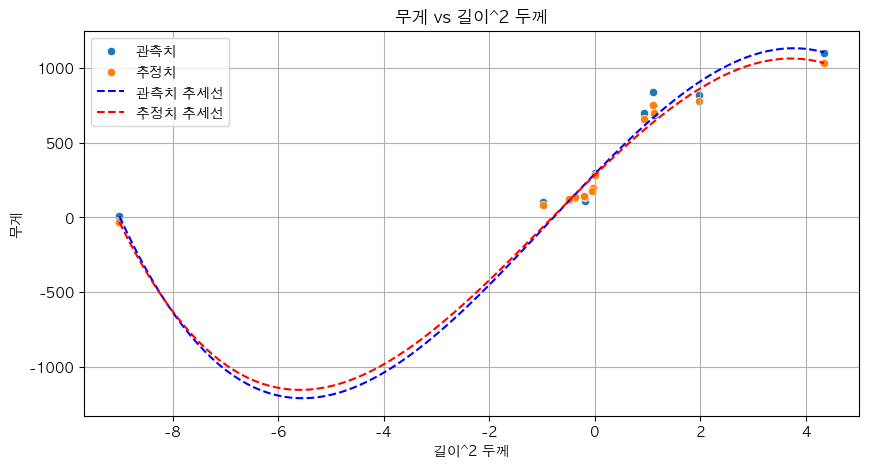

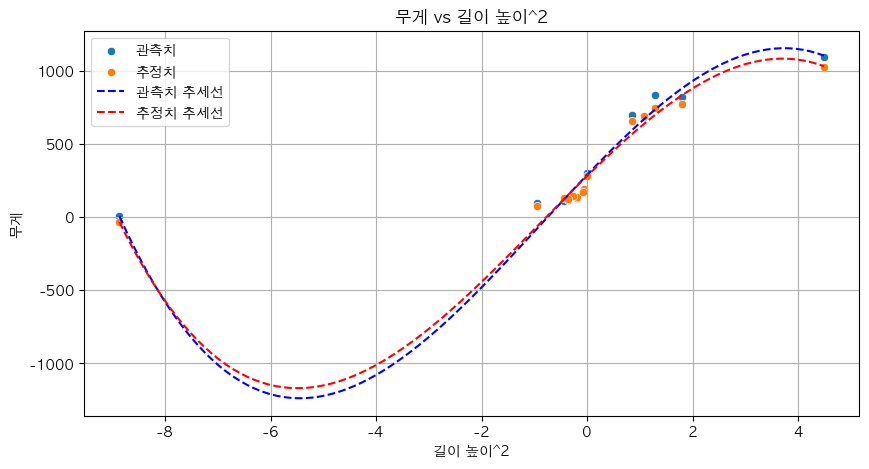

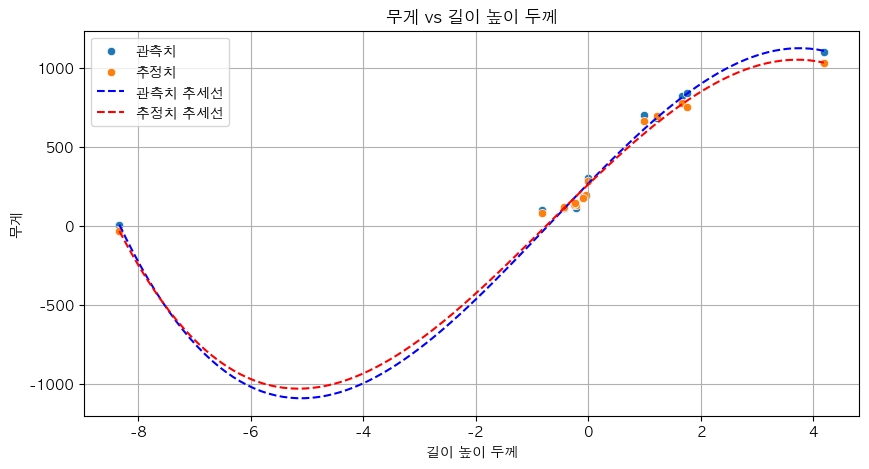

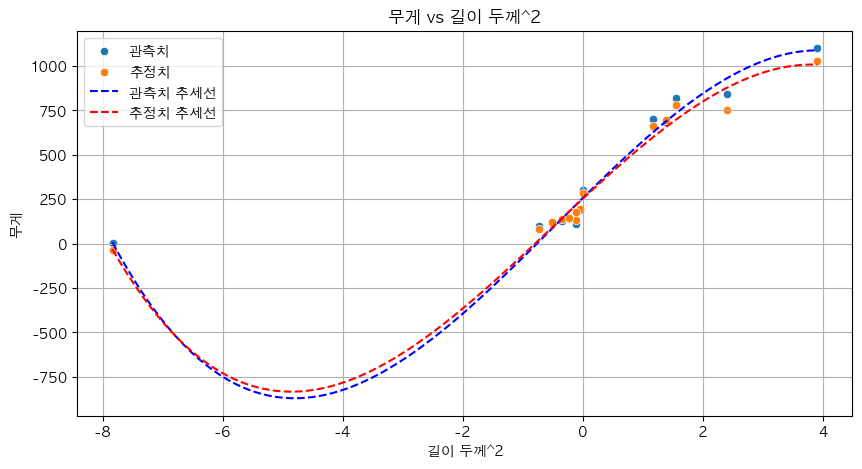

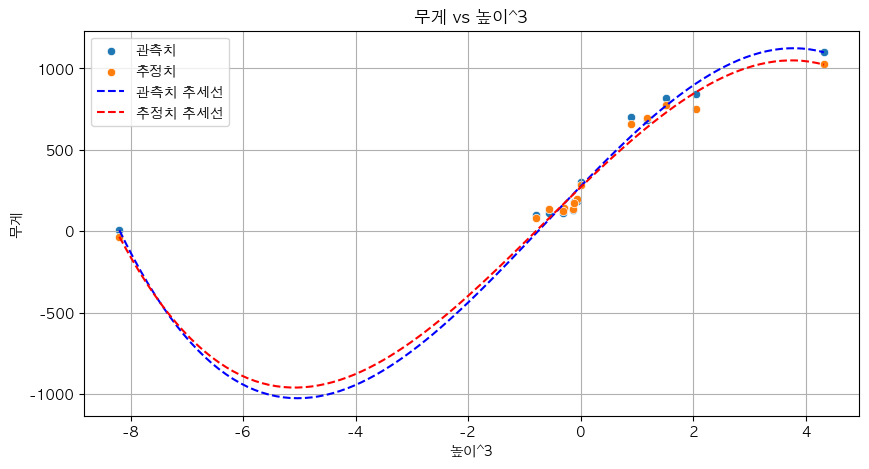

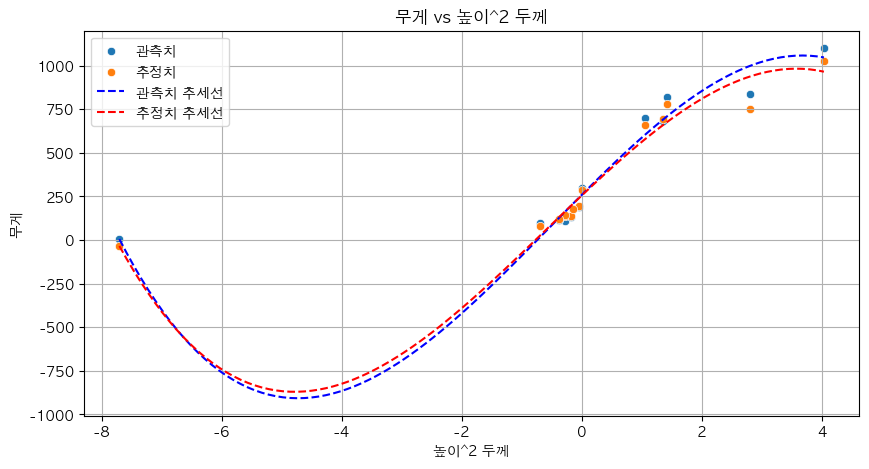

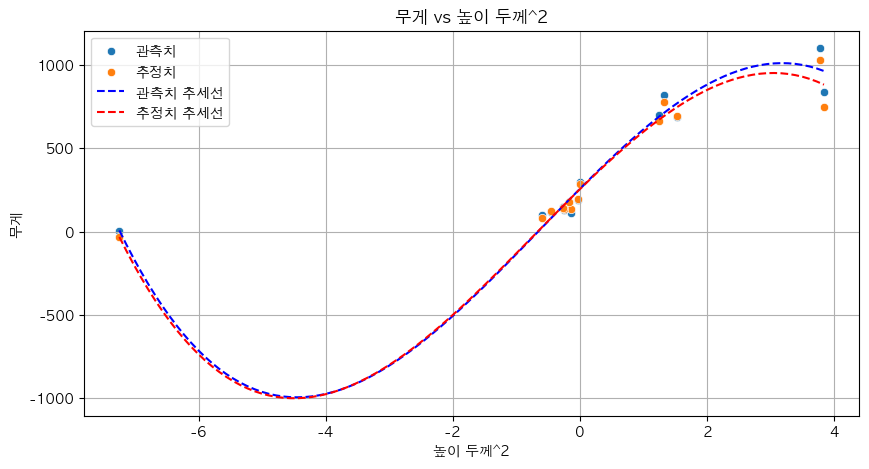

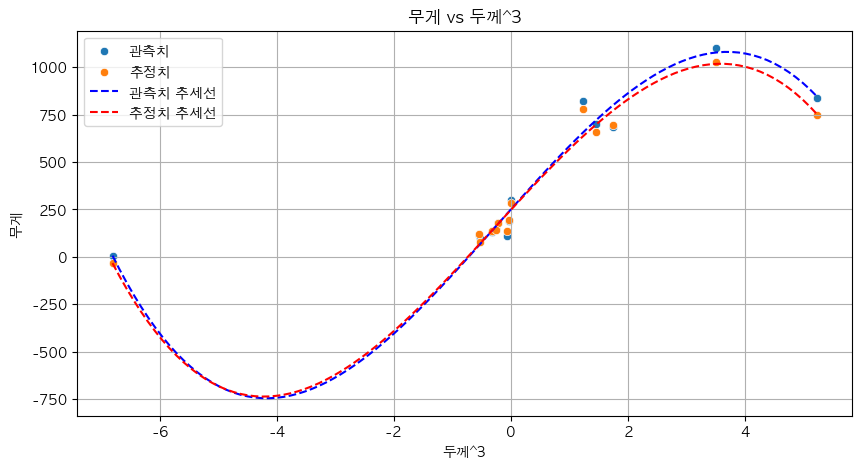



[ÏûîÏ∞®Ïùò Í∞ÄÏ†ï ÌôïÏù∏] ==============================
[ÏûîÏ∞®Ïùò ÏÑ†ÌòïÏÑ± Í∞ÄÏ†ï]


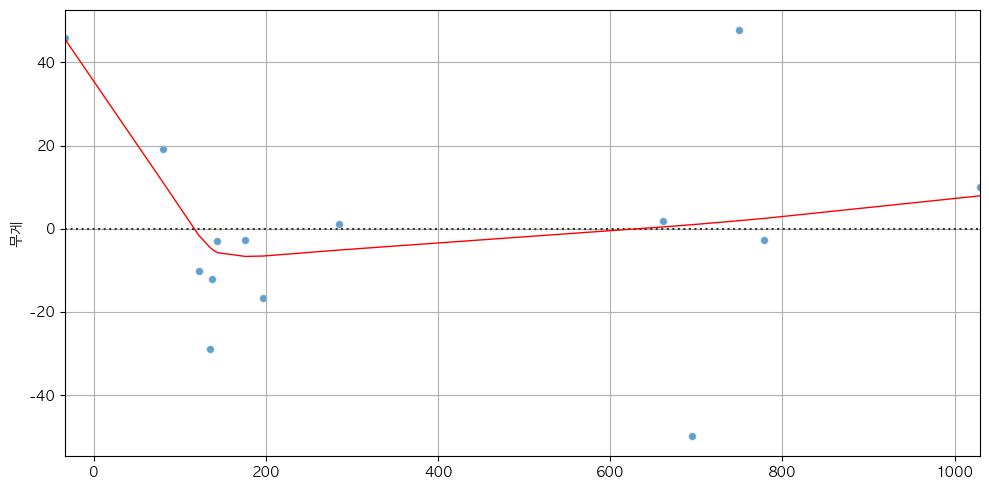


[ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï]


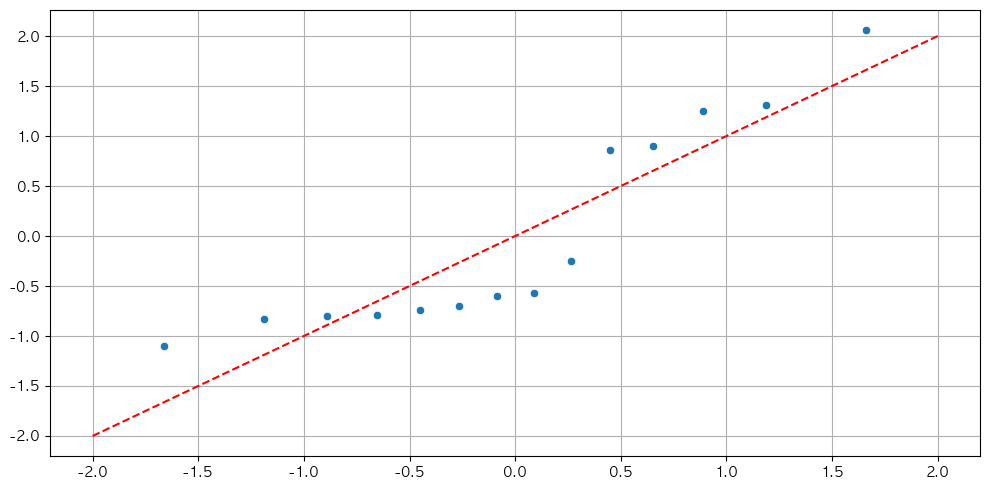

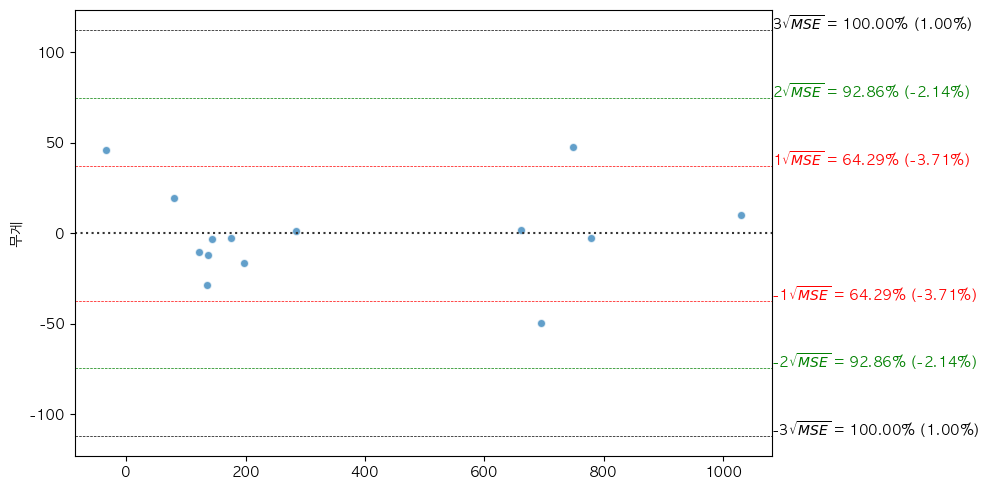

Î£®Ìä∏ 1MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 64.29% (-3.714285714285708)
Î£®Ìä∏ 2MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 92.86% (-2.142857142857139)
Î£®Ìä∏ 3MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 100.00% (1.0)
ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False

[ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï]
ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: True
+-----------+----------+
|           |   values |
|-----------+----------|
| statistic |       14 |
| p-value   | 0.783691 |
| f-value   |      nan |
| f p-value |      nan |
+-----------+----------+

[ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï]
Durbin-Watson: 1.6772380273885017, ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÎßåÏ°± Ïó¨Î∂Ä: True


Ridge(alpha=1)

In [30]:
my_ridge_regrassion(x_train, y_train, x_test, y_test, 
                    learning_curve=True,
                    report=True, plot=True, degree=3, 
                    resid_test=True, 
                    dpi=100)